In [3]:
!pip install pytrends seaborn pandas matplotlib numpy plotly

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq


**setup pytrend libary snd keyword define**









In [41]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = "Cloud Computing"

**Data Request**

In [9]:
pytrends.build_payload([kw_list], cat=0, timeframe='today 5-y', geo='', gprop='')

**Country Whise interest**

In [42]:
pytrends.build_payload([kw_list], cat=0, timeframe='today 5-y', geo='', gprop='')
region_data = pytrends.interest_by_region(resolution='COUNTRY', inc_geo_code=True)
region_data = region_data.sort_values(by=kw_list, ascending=False)
region_data.head(20)

,geoCode,Cloud Computing
geoName,,
Ethiopia,ET,100
Zimbabwe,ZW,87
Nepal,NP,76
India,IN,71
Cameroon,CM,59
St. Helena,SH,53
Sri Lanka,LK,51
Kenya,KE,51
Ghana,GH,43


/tmp/ipython-input-608821857.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




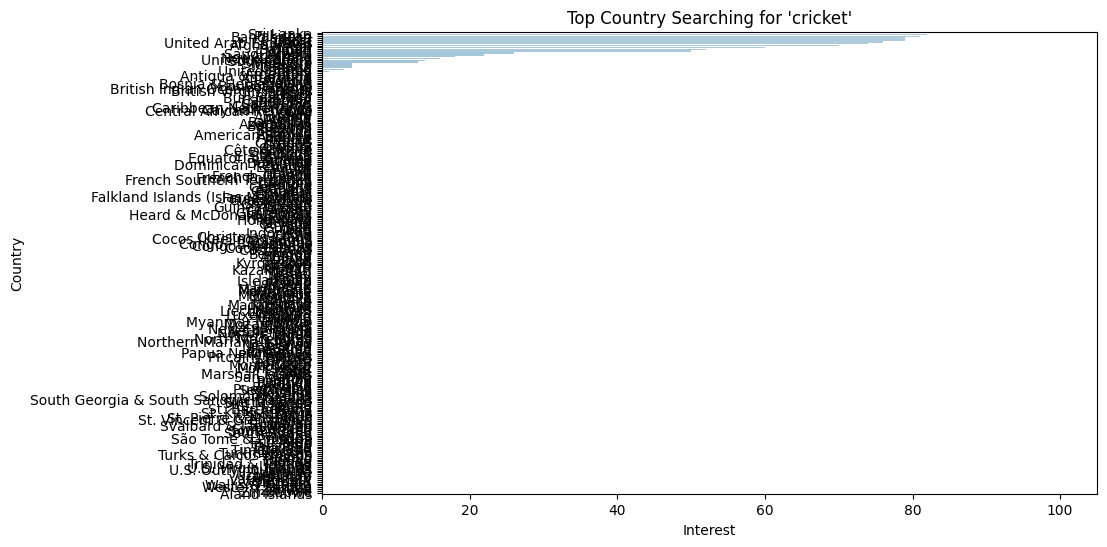

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[kw_list], y=region_data.index, palette="Blues_d")
plt.title(f"Top Country Searching for '{kw_list}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

**World Map**

In [29]:
import plotly.express as px

region_data = region_data.reset_index()
fig = px.choropleth (
    region_data,
    locations="geoCode",
    locationmode="ISO-3",
    color=kw_list,
    hover_name="geoName",
    hover_data=[kw_list],
)
fig.show()

**Time Wise Intersted**

In [30]:
time_df = pytrends.interest_over_time()
time_df.head()

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,cloud computing,isPartial
date,,
2020-09-20,63,False
2020-09-27,58,False
2020-10-04,62,False
2020-10-11,52,False
2020-10-18,51,False


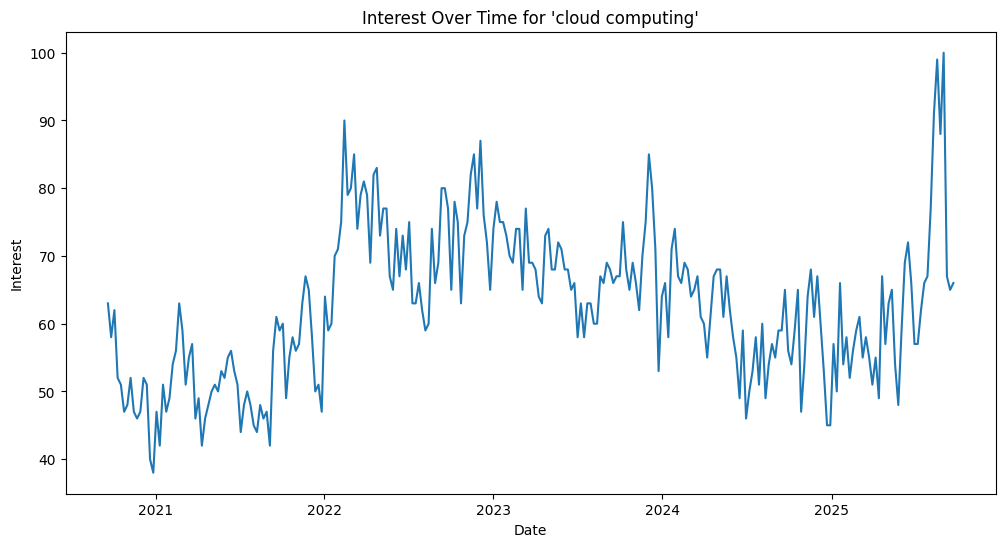

In [31]:
plt.figure (figsize=(12,6))
plt.plot(time_df[kw_list])
plt.title(f"Interest Over Time for '{kw_list}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.show()

**Multiple keywords Compare**




In [34]:
kw_list =["cloud computing","Data Science","Machine Learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y',geo='',gprop='')

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



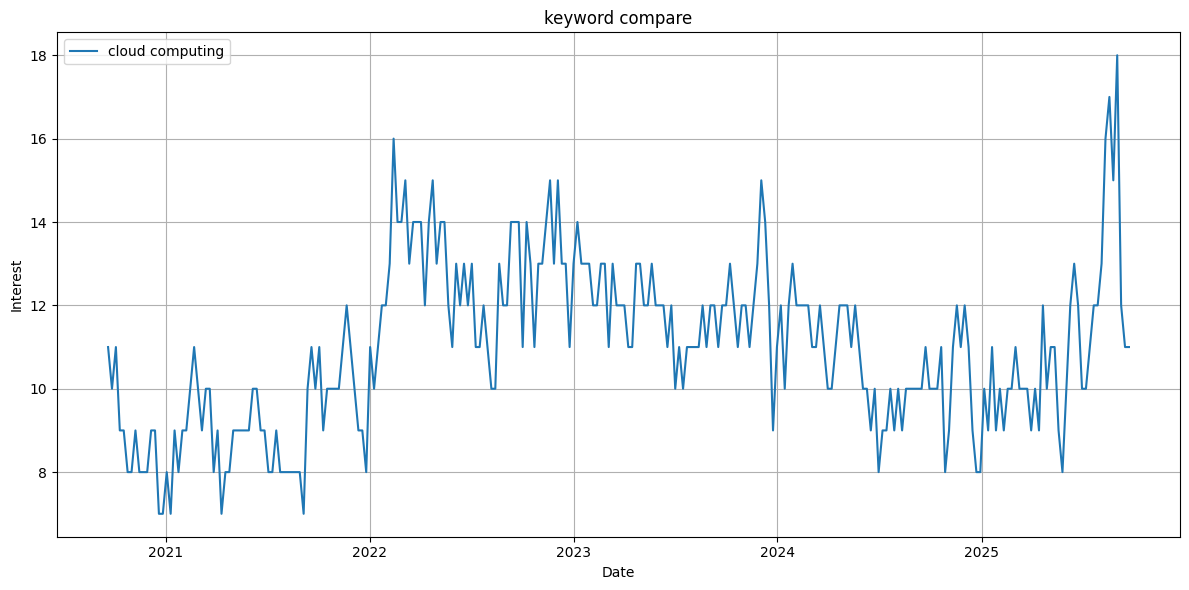

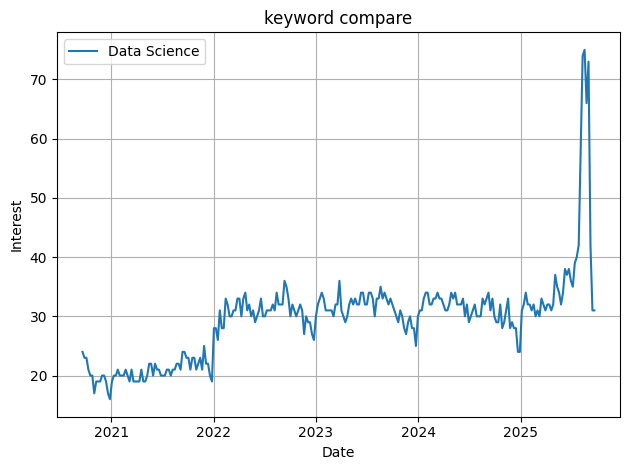

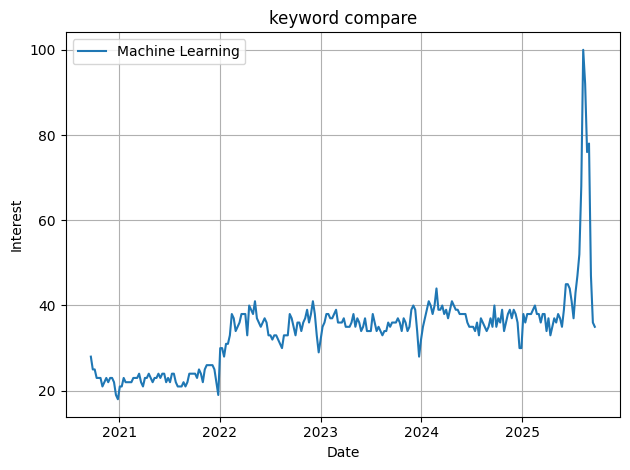

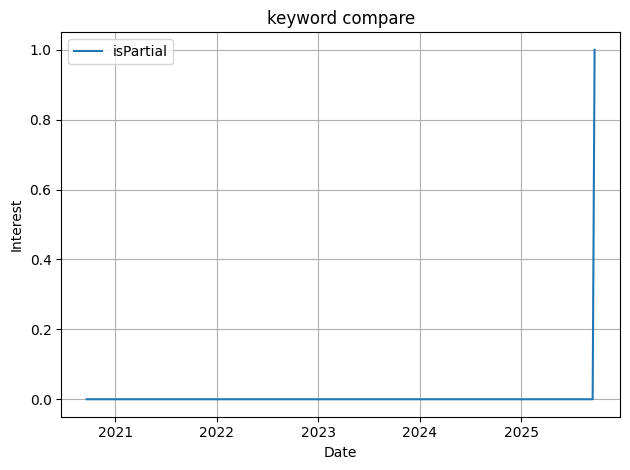

In [36]:
compare = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for col in compare.columns:
  plt.plot(compare[col], label=col)

  plt.title ("keyword compare")
  plt.xlabel("Date")
  plt.ylabel("Interest")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()